# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup

# visualizations
import matplotlib.pyplot as plt
import seaborn as sns

#data science - standard library
import pandas as pd
import numpy as np


#regression
from scipy.stats import linregress
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression



### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [2]:
filepath = "NT_cities.csv"
df = pd.read_csv(filepath)

df.head()

,City,Latitude,Longitude,Temperature,Feels Like,Humidity,Pressure,Wind Speed,Cloudiness
0,Lagoa,39.05,-27.98,60.89,52.72,73,1022,15.73,15.73
1,Carndonagh,55.25,-7.27,48.20,42.04,88,1014,8.77,8.77
2,Nikolskoye,59.70,30.79,45.07,35.20,81,1011,13.42,13.42
3,Ushuaia,-54.80,-68.30,55.40,42.04,47,994,18.34,18.34
4,Xifeng,42.74,124.72,34.29,21.25,69,1026,15.23,15.23


In [3]:
df.shape

(547, 9)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 547 entries, 0 to 546
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   City         547 non-null    object 
 1   Latitude     547 non-null    float64
 2   Longitude    547 non-null    float64
 3   Temperature  547 non-null    float64
 4   Feels Like   547 non-null    float64
 5   Humidity     547 non-null    int64  
 6   Pressure     547 non-null    int64  
 7   Wind Speed   547 non-null    float64
 8   Cloudiness   547 non-null    float64
dtypes: float64(6), int64(2), object(1)
memory usage: 38.6+ KB


In [5]:
df.describe()

,Latitude,Longitude,Temperature,Feels Like,Humidity,Pressure,Wind Speed,Cloudiness
count,547.000000,547.000000,547.000000,547.000000,547.000000,547.000000,547.000000,547.000000
mean,19.842962,16.828611,57.444589,53.862797,72.404022,1014.102377,8.101444,8.101444
std,33.666870,88.701592,23.030135,27.712989,20.182306,9.346041,5.861188,5.861188
min,-54.800000,-179.170000,-13.740000,-23.620000,8.000000,929.000000,0.270000,0.270000
25%,-7.125000,-63.105000,43.125000,35.905000,61.500000,1011.000000,3.760000,3.760000
50%,22.520000,19.570000,60.760000,57.070000,77.000000,1014.000000,6.930000,6.930000
75%,47.010000,95.320000,76.775000,78.590000,88.000000,1020.000000,11.410000,11.410000
max,78.220000,178.420000,104.000000,100.690000,100.000000,1030.000000,40.870000,40.870000


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [6]:
# No cities have humidity > 100%

In [7]:
#  Get the indices of cities that have humidity over 100%.


In [8]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


## Latitude vs. Temperature Plot

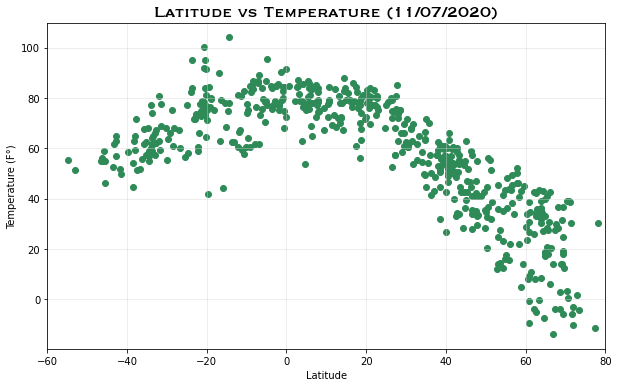

In [9]:
plt.figure(figsize=(10,6))

plt.scatter(df.Latitude, df.Temperature, color = "seagreen")
plt.title("Latitude vs Temperature (11/07/2020)", fontsize=18, fontweight="bold", fontname = "Copperplate")
plt.xlabel("Latitude")
plt.ylabel("Temperature (F°)")
plt.grid(color="lightgrey", alpha = 0.5)

plt.xlim(-60, 80)
plt.savefig("LatVsTemp.png")
plt.show()

## Latitude vs. Humidity Plot

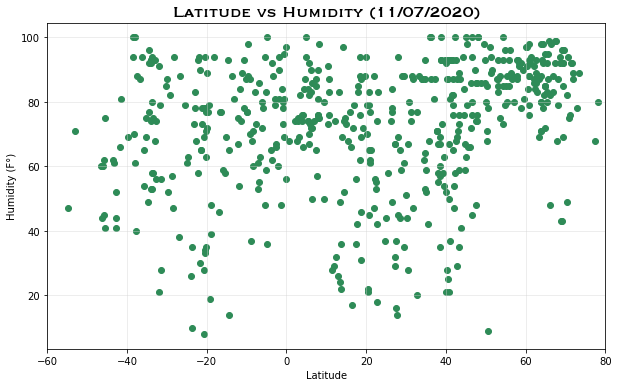

In [10]:
plt.figure(figsize=(10,6))

plt.scatter(df.Latitude, df.Humidity, color = "seagreen")
plt.title("Latitude vs Humidity (11/07/2020)", fontsize=18, fontweight="bold", fontname = "Copperplate")
plt.xlabel("Latitude")
plt.ylabel("Humidity (F°)")
plt.grid(color="lightgrey", alpha = 0.5)

plt.xlim(-60, 80)
plt.savefig("LatVsHum.png")
plt.show()

## Latitude vs. Cloudiness Plot

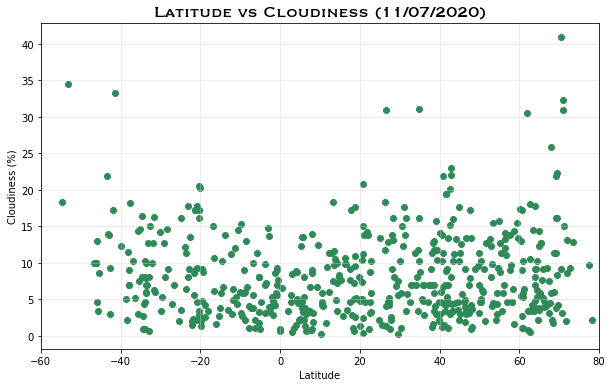

In [11]:
plt.figure(figsize=(10,6))

plt.scatter(df.Latitude, df.Cloudiness, color = "seagreen")
plt.title("Latitude vs Cloudiness (11/07/2020)", fontsize=18, fontweight="bold", fontname = "Copperplate")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(color="lightgrey", alpha = 0.5)

plt.xlim(-60, 80)
plt.savefig("LatVsCloud.png")
plt.show()

## Latitude vs. Wind Speed Plot

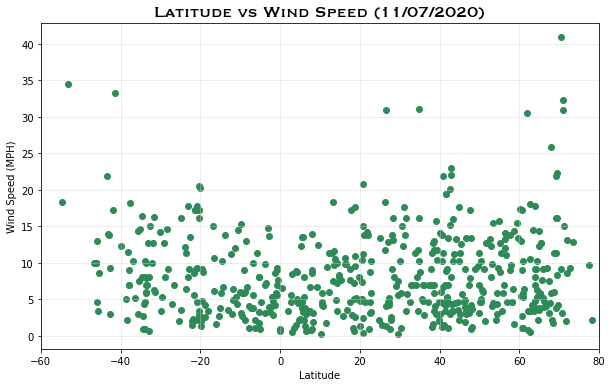

In [12]:
plt.figure(figsize=(10,6))

plt.scatter(df.Latitude, df["Wind Speed"], color = "seagreen")
plt.title("Latitude vs Wind Speed (11/07/2020)", fontsize=18, fontweight="bold", fontname = "Copperplate")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (MPH)")
plt.grid(color="lightgrey", alpha = 0.5)

plt.xlim(-60, 80)
plt.savefig("LatVsWind.png")
plt.show()

## Linear Regression

In [13]:
corrs = df.corr()
corrs

,Latitude,Longitude,Temperature,Feels Like,Humidity,Pressure,Wind Speed,Cloudiness
Latitude,1.000000,-0.084040,-0.666489,-0.655411,0.256674,0.013554,0.025351,0.025351
Longitude,-0.084040,1.000000,0.081120,0.063041,-0.273645,-0.054394,0.039975,0.039975
Temperature,-0.666489,0.081120,1.000000,0.984790,-0.379334,-0.056523,-0.033158,-0.033158
Feels Like,-0.655411,0.063041,0.984790,1.000000,-0.282498,-0.039031,-0.166135,-0.166135
Humidity,0.256674,-0.273645,-0.379334,-0.282498,1.000000,-0.058857,-0.067973,-0.067973
Pressure,0.013554,-0.054394,-0.056523,-0.039031,-0.058857,1.000000,-0.204044,-0.204044
Wind Speed,0.025351,0.039975,-0.033158,-0.166135,-0.067973,-0.204044,1.000000,1.000000
Cloudiness,0.025351,0.039975,-0.033158,-0.166135,-0.067973,-0.204044,1.000000,1.000000


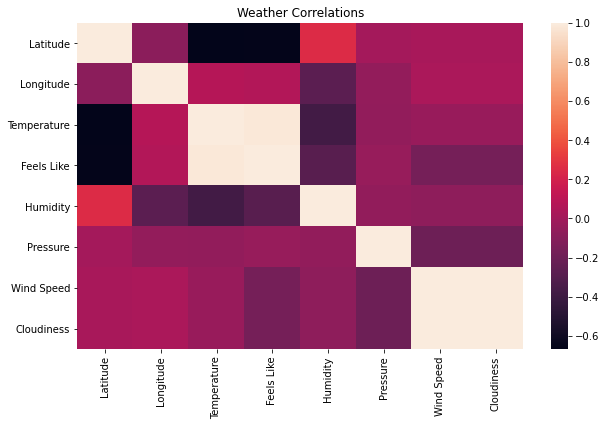

In [27]:
plt.figure(figsize=(10,6))

sns.heatmap(corrs)

plt.title("Weather Correlations")
plt.show()

In [14]:
target = df.Temperature
feature = df.Latitude

In [15]:
# STATSMODELS
X = sm.add_constant(feature)
Y = target
model = sm.OLS(Y,X)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            Temperature   R-squared:                       0.444
Model:                            OLS   Adj. R-squared:                  0.443
Method:                 Least Squares   F-statistic:                     435.6
Date:                Sat, 07 Nov 2020   Prob (F-statistic):           1.58e-71
Time:                        23:52:14   Log-Likelihood:                -2330.8
No. Observations:                 547   AIC:                             4666.
Df Residuals:                     545   BIC:                             4674.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         66.4913      0.853     77.940      0.000      64.816      68.167
Latitude      -0.4559      0.022    -20.871      0.000      -0.499      -0.413
==============================================================================
Omnibus:                       35.493   Durbin-Watson:                   2.007
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               39.403
Skew:                          -0.635   Prob(JB):                     2.78e-09
Kurtosis:                       2.658   Cond. No.                         45.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [16]:
slope = results.params[1]
intercept = results.params[0]

regress_values = feature * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
line_eq

'y = -0.46x + 66.49'

In [17]:
northern = df.loc[df["Latitude"] >= 0.0]
northern.reset_index(inplace=True)

southern = df.loc[df["Latitude"] < 0.0]
southern.reset_index(inplace=True)

In [18]:
# Define plotting function

def plotLinearRegression(xdata,ydata,xlbl,ylbl,lblpos,ifig):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(xdata, ydata)
    print(f"The r-squared is: {rvalue}")
    regress_values = xdata * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

    plt.scatter(xdata,ydata)
    plt.plot(xdata,regress_values,"r-")
    plt.annotate(line_eq,lblpos,fontsize=15,color="red")
    plt.title(f"fig{ifig}(11/07/2020)", fontsize=18, fontweight="bold", fontname = "Copperplate")
    plt.xlabel(xlbl)
    plt.ylabel(ylbl)
    plt.savefig(f"fig{ifig}.png")
    plt.show()

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: -0.8808446290631535


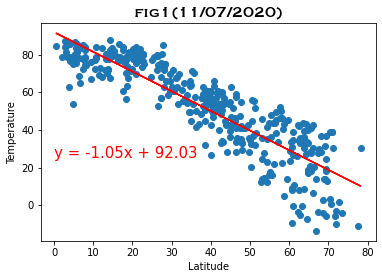

In [19]:
xlbl = "Latitude"
ylbl = "Temperature"
lblpos = (0,25)
plotLinearRegression(northern[xlbl],northern[ylbl],xlbl,ylbl,lblpos,1)

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.639443738478774


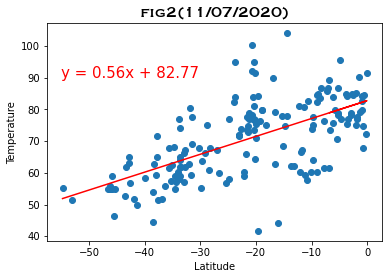

In [20]:
xlbl = "Latitude"
ylbl = "Temperature"
lblpos = (-55,90)
plotLinearRegression(southern[xlbl],southern[ylbl],xlbl,ylbl,lblpos,2)

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.32745368399679115


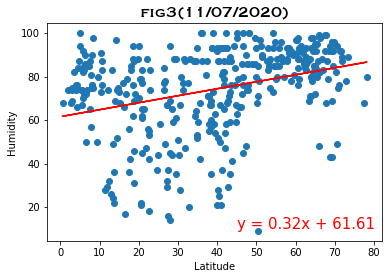

In [21]:
xlbl = "Latitude"
ylbl = "Humidity"
lblpos = (45,10)
plotLinearRegression(northern[xlbl],northern[ylbl],xlbl,ylbl,lblpos,3)

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.1523920795209472


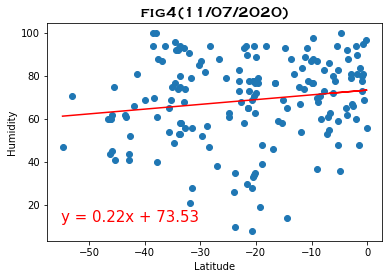

In [22]:
xlbl = "Latitude"
ylbl = "Humidity"
lblpos = (-55,12)
plotLinearRegression(southern[xlbl],southern[ylbl],xlbl,ylbl,lblpos,4)

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.18795121188620306


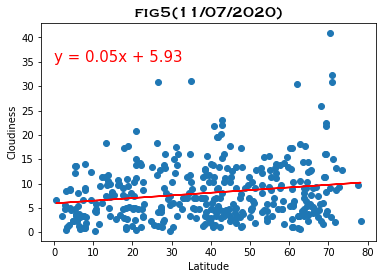

In [23]:
xlbl = "Latitude"
ylbl = "Cloudiness"
lblpos = (0,35)
plotLinearRegression(northern[xlbl],northern[ylbl],xlbl,ylbl,lblpos,5)

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: -0.3344762438551881


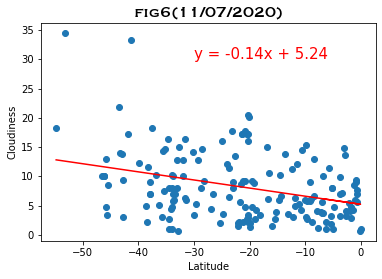

In [24]:
xlbl = "Latitude"
ylbl = "Cloudiness"
lblpos = (-30,30)
plotLinearRegression(southern[xlbl],southern[ylbl],xlbl,ylbl,lblpos,6)

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.18795121188620306


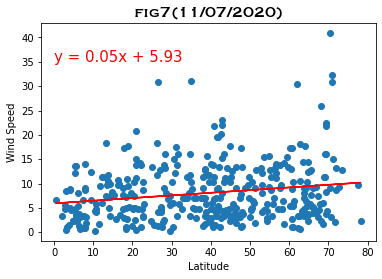

In [25]:
xlbl = "Latitude"
ylbl = "Wind Speed"
lblpos = (0,35)
plotLinearRegression(northern[xlbl],northern[ylbl],xlbl,ylbl,lblpos,7)

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: -0.3344762438551881


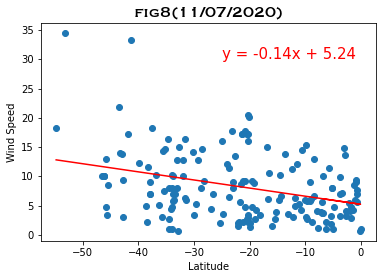

In [26]:
xlbl = "Latitude"
ylbl = "Wind Speed"
lblpos = (-25,30)
plotLinearRegression(southern[xlbl],southern[ylbl],xlbl,ylbl,lblpos,8)

# Summary

-Just as we are expecting, scatter chart of temperature and latitude is in a downward U shaped as temperature will drop or colder toward Northern and Southern poles. 

-Despite quite high correlated according to correlating chart, latitude and humidity chart shows no change of humidity according to latitude.

-Lastly, wind speed and cloudiness are positively similar in term of changing latitude.